## Problem Statement

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

Importing packages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Reading the Data
1. Train Data - for training the model. It contains all the independent variables and the target variable.
2. Test Data - for testing the model. We will apply the model to predict the target variable for the test data.

In [7]:
train = pd.read_csv("train_ctrUa4K.csv")
test = pd.read_csv("test_lAUu6dG.csv")

Let's make copies of our original datasets so as to not make any changes in them accidentally

In [8]:
train_original = train.copy()
test_original = test.copy()

Exploring the data - type of data and variables provided in the dataset

In [9]:
print(train.columns)
print(test.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


The format of both the train and test data is the same. There are 12 independent variables and 1 target variable, i.e. Loan_Status in the train dataset. Test data has the same 12 independent variable except for the target variable Loan_Status as we have to predict that using our model on the test data. Let's print the variable types.

In [10]:
print(train.dtypes)
print(train.shape) #gives us the size of our train dataset

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object
(614, 13)


Print the head of the dataset to see if the variable types match the type of data entry into each column.

In [11]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Understanding the data.
Loan_ID = Unique Loan ID <br>
Gender = Male/Female <br>
Married = Applicant married (Y/N) <br>
Dependents = No. of dependents <br>
Education = Applicant education (Graduate/Not graduate) <br>
Self_Employed = Y/N <br>
ApplicantIncome = Applicant income in thousands/per year <br>
CoapplicantIncome = Coapplicant income in thousands/per year <br>
LoanAmount = Amount of Loan in thousands <br>
Loan_Amount_Term = Term of loan in months <br>
Credit_History = Credit history meets guidelines <br>
Property_Area = Urban/Semi Urban/Rural <br>
Loan_Status = Loan approved (Y/N) <br>

Also check the size of test dataset

In [12]:
test.shape

(367, 12)

Next we perform univariate analysis where we examine each variable individually. For categorical variables, we will use bar plots or frequency tables. For numerical features, probability density plots can be used to look at the distribution of the variable.

Let's check for how many entries, the loan has been approved.

In [13]:
print(train['Loan_Status'].value_counts())
print(train['Loan_Status'].value_counts(normalize= True))

Y    422
N    192
Name: Loan_Status, dtype: int64
Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64


Out of 614 applicants, only 422 could get their loan approved which is almost 69% of the total applications.
Let's plot this data on a bar chart.

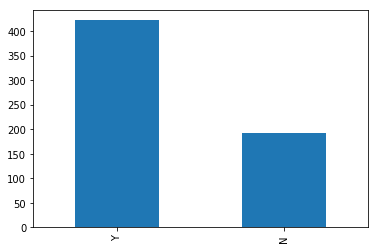

In [14]:
train['Loan_Status'].value_counts().plot(kind='bar')

Now lets visualize each variable separately. Different types of variables are Categorical, ordinal and numerical.

1. Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)
2. Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)
3. Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

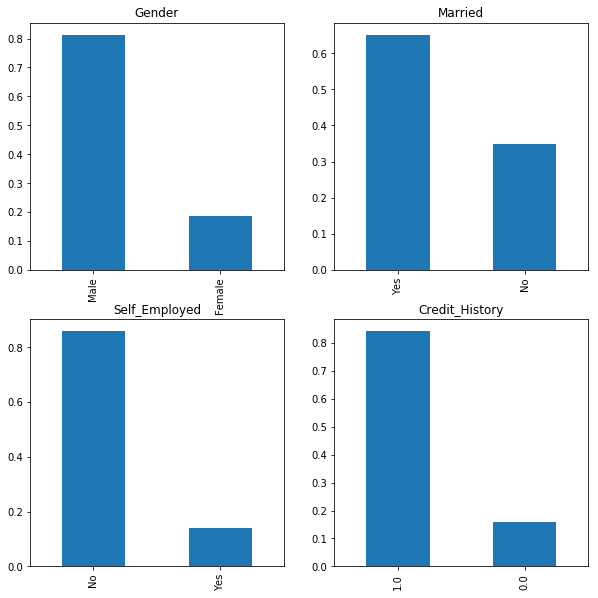

In [15]:
#LET'S VISUALIZE THE CATEGORICAL VARIABLES USING BAR PLOTS

plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot(kind='bar',title ='Gender',figsize = (10,10)) 

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title = 'Married') 
# normalization has been used to identify the percentages

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot(kind='bar',title ='Self_Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title = 'Credit_History')

From the above visualizatios it can be inferred:
1. 80% applicants are Male and only 20% Female
2. 15% applicants are self employed
3. 65% are married and 35% are unmarried
4. 85% applicants have a credit history i.e. they have paid their debts

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64
Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64
Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64


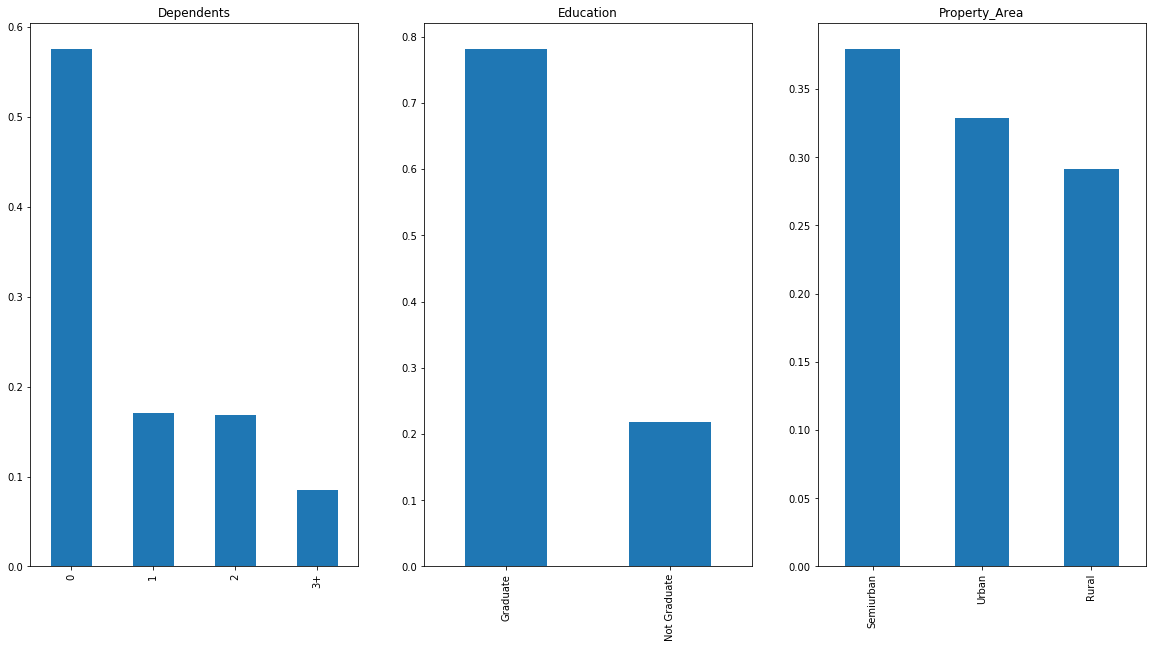

In [16]:
# LET'S VISUALIZE THE ORDINAL VARIABLES (Dependents, Education, Property_Area) USING BAR PLOTS 

plt.figure(2)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(title = 'Dependents',figsize=(20,10)) 

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title = 'Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title = 'Property_Area')

print(train['Dependents'].value_counts(normalize=True))
print(train['Education'].value_counts(normalize=True))
print(train['Property_Area'].value_counts(normalize=True))

The following inferences can be made from the results above
1. Most of the applicants don't have any dependents and only 8% have 3 or more.
2. 78% applicants are graduates whereas 21% are not.
3. Mojority people are from SemiUrban areas - 38%. 32% are from Urban areas and 30% from rural areas.

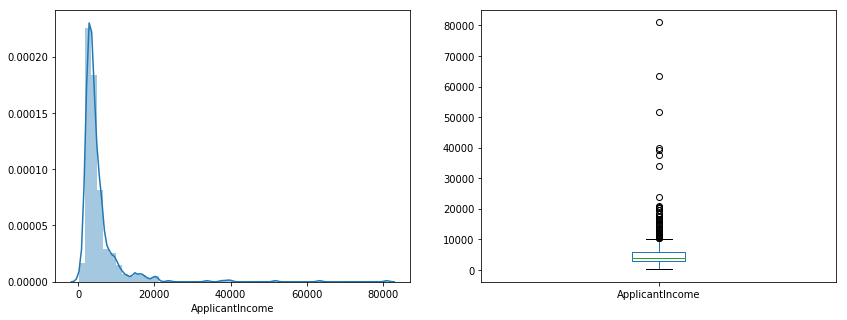

In [17]:
#LET'S VISUALIZE THE NUMERICAL VARIABLES (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])

plt.subplot(122)
train['ApplicantIncome'].plot(kind='box',figsize=(14,5))

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is <b>not normally distributed</b>. We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

Text(0.5, 0.98, '')

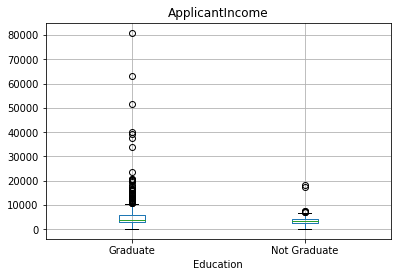

In [18]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")

This shows that theres are higher number of graduates who have higher incomes which seem to be the majority outliers in the boxplot.

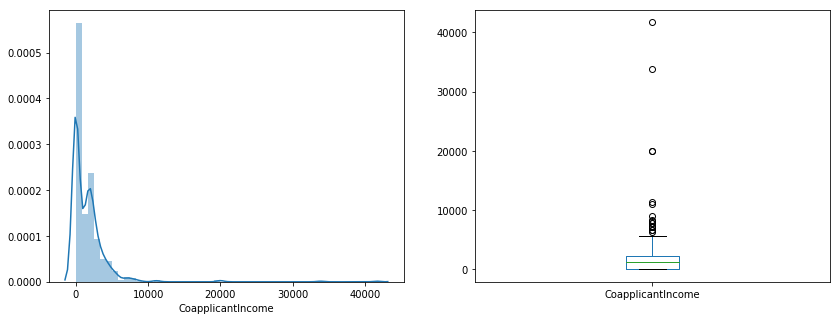

In [19]:
#LET'S VISUALIZE THE COAPPLICANT INCOME DISTRIBUTION.

plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(14,5))


We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

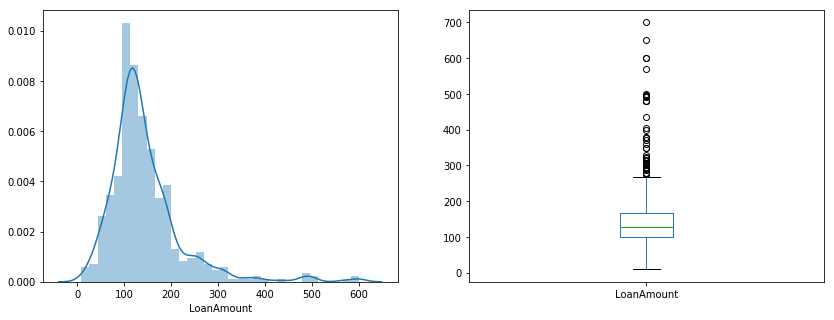

In [20]:
#LET'S VISUALIZE THE LoanAmount VARIABLE

plt.figure(1)
plt.subplot(121)
df_train = train.dropna() # to remove 'cannot convert float NaN to integer' error
sns.distplot(df_train['LoanAmount'])

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(14,5))


There are many outliers in the LoanAmount as well. 
We'll deal witht them in the later section but first we need to see how each variable correlates with Loan_Status. This is done using <b>bivariate analysis<b/>.

INITIAL HYPOTHESIS:

1. People having higher incomes should have higher chances of loan approval.
2. People have who paid their previous debt i.e. have a good credit history, should have better chances of loan approval.
3. Loan Amount is also a deciding factor. Lesser loan amounts should have higher chance of getting approved.
4. Lesser the repayment amount per month against the loan, higher should be the loan approval chances. 

CATEGORICAL VARIABLE AGAINST TARGET VARIABLE

Using stacked bar plots on target variable and the categorical independent variable gives us an idea about the proportion of approved and unapproved loans.

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


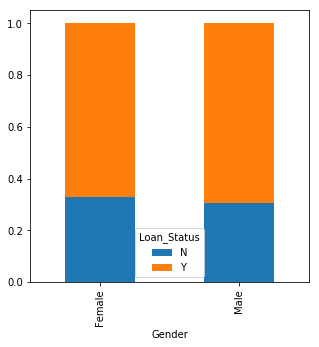

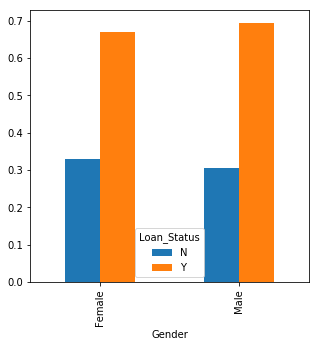

In [21]:
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
print(Gender)
Gender_div = Gender.div(Gender.sum(1).astype(float), axis = 0)
#plt.subplot(121)
Gender_div.plot(kind='bar',stacked=True,figsize=(5,5))

#plt.subplot(122)
Gender_div.plot(kind='bar',stacked=False,figsize=(5,5))
plt.show()


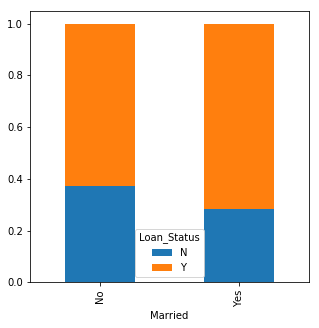

In [22]:
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Married_div = Married.div(Married.sum(1).astype(float),axis = 0)
Married_div.plot(kind='bar',stacked=True,figsize=(5,5))


Proportion for married applicants is higher for loan approval.

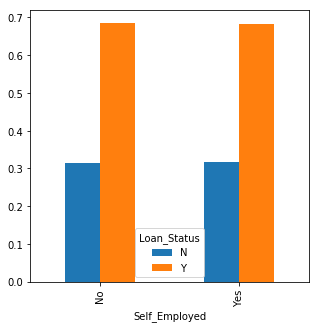

In [23]:
Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed_div = Self_Employed.div(Self_Employed.sum(1).astype(float),axis = 0)
Self_Employed_div.plot(kind='bar',figsize=(5,5))
#Self_Employed_div.plot(kind='bar',stacked=True,figsize=(5,5))

According to the above graph there is no bias towards Self_Employment for approval. Approved and unapproved proportions seem to be the same. 

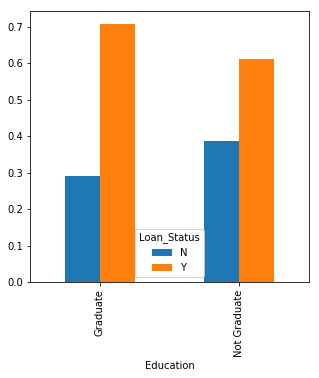

In [24]:
Education = pd.crosstab(train['Education'],train['Loan_Status'])
Education_div = Education.div(Education.sum(1).astype(float),axis = 0)
Education_div.plot(kind='bar',stacked=False,figsize=(5,5))
#Education_div.plot(kind='bar',stacked=True,figsize=(5,5))

Graduates have a higher proportion of loan approvals and lower proportions of loan rejection.

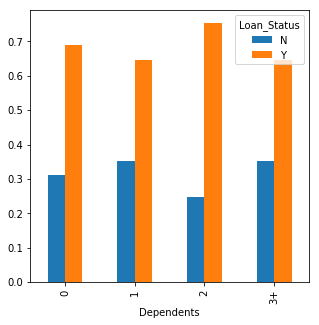

In [25]:
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents_div = Dependents.div(Dependents.sum(1).astype(float),axis = 0)
Dependents_div.plot(kind='bar',stacked=False,figsize=(5,5))
#Dependents_div.plot(kind='bar',stacked=True,figsize=(5,5))

Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

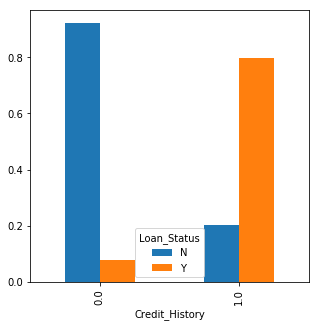

In [26]:
Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History_div = Credit_History.div(Credit_History.sum(1).astype(float),axis = 0)
Credit_History_div.plot(kind='bar',figsize=(5,5))

People with a credit history of 1 are more likely to gettheir loan approved, whereas most applicants with 0 credit have been rejected for loan. But still a few people with positive credit history have been rejected. Wonder why?

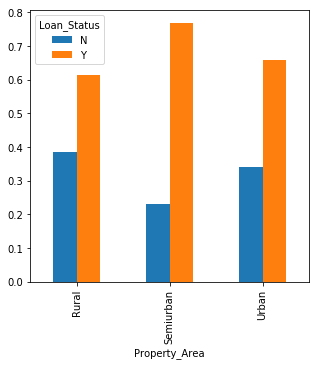

In [27]:
Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area_div = Property_Area.div(Property_Area.sum(1).astype(float),axis = 0)
#Property_Area_div.plot(kind='bar',stacked=True,figsize=(5,5))
Property_Area_div.plot(kind='bar',figsize=(5,5))

Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.


NUMERICAL INDEPENDENT VARIABLE AGAINST TARGET VARIABLE

Since income is a numerical variable and has values over a large range, we can categorize the incomes into say 4 categories of 'Low','Average','High','Very High' by using binning with bin values as 0, 2000, 4000, 6000, 81000 

In [28]:
#Lets find out the details of the person with maximum ApplicantIncome in the given train dataset

print(train.loc[train["ApplicantIncome"].idxmax()])

#Let us also print the mean, 25%,50%,75% of the ApplicantIncome to support the values chosen for binning
print(train["ApplicantIncome"].describe())

Loan_ID              LP002317
Gender                   Male
Married                   Yes
Dependents                 3+
Education            Graduate
Self_Employed              No
ApplicantIncome         81000
CoapplicantIncome           0
LoanAmount                360
Loan_Amount_Term          360
Credit_History              0
Property_Area           Rural
Loan_Status                 N
Name: 409, dtype: object
count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64


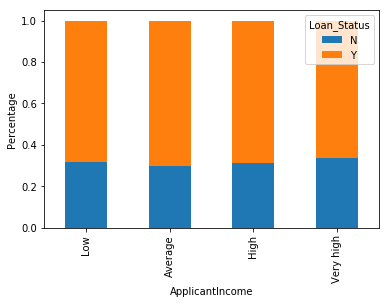

In [29]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

The above results show that ApplicantIncome has no effect on Loan_Status which contradicts our hypothesis.
Let's analyze the effect of coapplicantIncome on Loan_Status

In [30]:
print(train["CoapplicantIncome"].describe())

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64


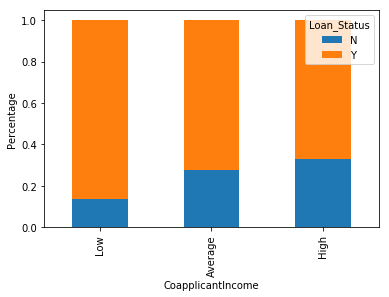

In [31]:
bins2=[0,1000,3000,42000] 
group2=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins2,labels=group2)

Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')

From the above graph we can infer that applicants having low coapplicant incomes have a higher chance of loan approval than those whose coapplicant income is higher. This doesnt fit logically into the problem as CoapplicantIncome should be higher to help repay the loan. <br>

Let's repeat the same procedure to see the effect with combined applicantIncome and CoapplicantIncome. This is done to avoid those cases when while CoapplicantIncome dependency on Loan_Status, observation with 0 values made Loan_Status indepenedent of coapplicantIncome.

In [32]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
print(train['Total_Income'].describe())

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Total_Income, dtype: float64


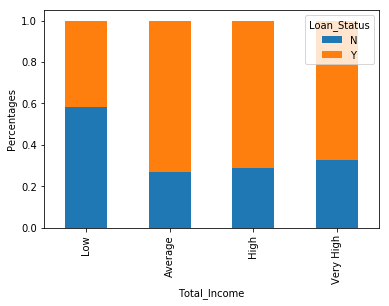

In [33]:
bins3 = [0,2500,4000,6000,81000]
group3 = ['Low','Average','High','Very High']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins3,labels=group3)

Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis = 0).plot(kind='bar',stacked =True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentages')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.<br>

Let’s visualize the Loan amount variable.

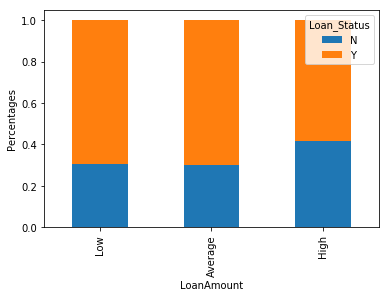

In [34]:
bin4 = [0,100,300,700]
group4 = ['Low','Average','High']

train['LoanAmount_bin'] = pd.cut(train['LoanAmount'],bin4,labels= group4)
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin = LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis = 0).plot(kind='bar',stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel("Percentages")

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

Let us find correlations between the categorical variables that affect Loan_Status with the numerical variables using HeatMap. We need to convert all strings to numerical values so all 3+ will be replaced by 3 in depenedent variable and the Yes to 1 and No to 0 in Loan_Status variable. One more reason to do so is few models like logistic regression takes only numeric values as input. 

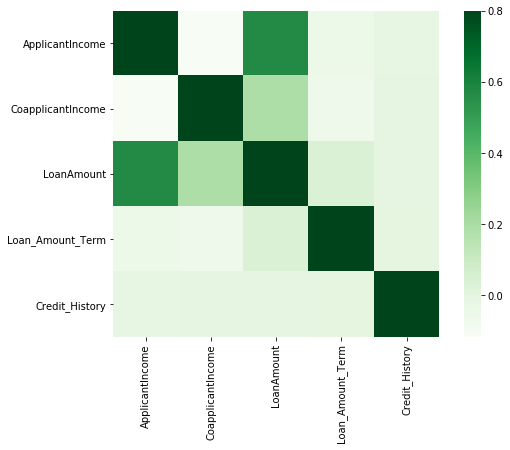

In [35]:
#first we will drop all the bins that we created from our data frame
train = train.drop(['LoanAmount_bin','Total_Income_bin','Total_Income','Coapplicant_Income_bin','Income_bin'], axis = 1)

#now we will replace non numeric values with numeric values.
train['Dependents'].replace('3+',3, inplace= True)
test['Dependents'].replace('3+',3, inplace= True)
train['Loan_Status'].replace('No',0,inplace=True)
train['Loan_Status'].replace('Yes',1,inplace=True)

#Now let's plot the HeatMap to understand the correlation between variables.
matrix = train.corr()
f,ax = plt.subplots(figsize=(9,6)) 
sns.heatmap(matrix,vmax=0.8,square=True,cmap='Greens')


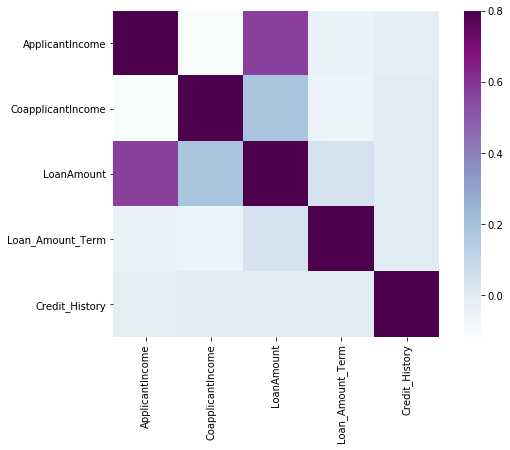

In [36]:
#Now let's plot the HeatMap to understand the correlation between variables.
matrix = train.corr()
f,ax = plt.subplots(figsize=(9,6)) 
sns.heatmap(matrix,vmax=0.8,square=True,cmap='BuPu')
#sns.heatmap(matrix,vmax=0.8,square=True,cmap='Blues')

Correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

We are yet to deal of the missing values if any.

## Missing Value Imputation

You will discover that there are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.

In [37]:
train.isnull().sum() #train.isnull().any() will return bool 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can treat the missing values according to the following:
    
    1. Categorical Variables- imputation using mode
    2. Numerical Variables-imputation using mean or median

In [38]:
# categorical variables using mode
train['Gender'].fillna(train['Gender'].mode()[0],inplace = True)
train['Married'].fillna(train['Married'].mode()[0],inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace = True)

In [39]:
train['Loan_Amount_Term'].value_counts()


360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [40]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace = True)

# since the loan amount term variable, the value of 360 is repeating the most. 
# So we replaced the missing values in this variable using the mode of this variable.

Dealing with all the missing values in numerical variables.

As our data has numerous outliers it will be better to fill the missing values in LoanAmount with the median of this variable instead of mean as mean is adversely affected by the presence of outliers.


In [41]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace = True)

#check if all missing values have been replaced
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

All the missing data has been taken care of in our train datset. 
Using the similar approach, we will fill all the missing values in our test dataset.

In [42]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace = True)
test['Married'].fillna(test['Married'].mode()[0],inplace = True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace = True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace = True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace = True)

test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace = True)

test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace = True)

#check if all missing values have been replaced
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Outlier Treatment

This is an important step to remove outlier bias in our results. Normalization is done to get the values under the same scale.<br>
Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

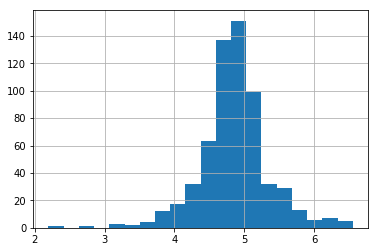

In [43]:
train['LoanAmount_Log'] = np.log(train['LoanAmount'])
train['LoanAmount_Log'].hist(bins=20)
test['LoanAmount_Log'] = np.log(test['LoanAmount'])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s build a logistic regression model and make predictions for the test dataset.

#### MODEL BUILDING AND EVALUATION

The process of model building is not complete without evaluation of model’s performance. Suppose we have the predictions from the model, how can we decide whether the predictions are accurate? We can plot the results and compare them with the actual values, i.e. calculate the distance between the predictions and actual values. Lesser this distance more accurate will be the predictions. Since this is a classification problem, we can evaluate our models using any one of the following evaluation metrics:

<b>Accuracy:</b> Let us understand it using the confusion matrix which is a tabular representation of Actual vs Predicted values. 
    1. True Positive - Targets which are actually true(Y) and we have predicted them true(Y)
    2. True Negative - Targets which are actually false(N) and we have predicted them false(N)
    3. False Positive - Targets which are actually false(N) but we have predicted them true(T)
    4. False Negative - Targets which are actually true(T) but we have predicted them false(N)
<b><u>ACURACY</u> = (True Positive + True Negative) / (True Positive + False Positive + True Negative + False Positive) </b>  

<b>Precision:</b> It is a measure of correctness achieved in true prediction i.e. of observations labeled as true, how many are actually labeled true.
<b><u>Precision</u> = TP / (TP + FP)</b>

<b>Recall(Sensitivity)</b> - It is a measure of actual observations which are predicted correctly i.e. how many observations of true class are labeled correctly. It is also known as ‘Sensitivity’.
<b><u>Recall</u> = TP / (TP + FN)</b>

<b>Specificity</b> - It is a measure of how many observations of false class are labeled correctly.
<b><u>Specificity</u> = TN / (TN + FP)</b>

Specificity and Sensitivity plays a crucial role in deriving ROC curve.

<b><u>ROC curve</u></b>
Receiver Operating Characteristic(ROC) summarizes the model’s performance by evaluating the trade offs between true positive rate (sensitivity) and false positive rate(1- specificity).
The area under curve (AUC), referred to as index of accuracy(A) or concordance index, is a perfect performance metric for ROC curve. Higher the area under curve, better the prediction power of the model.

Let us make our first model to predict the target variable. We will start with <b>Logistic Regression</b> which is used for predicting binary outcome.

Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.
Logistic regression is an estimation of Logit function. Logit function is simply a log of odds in favor of the event.
This function creates a s-shaped curve with the probability estimate, which is very similar to the required step wise function

In [44]:
#Let's drop the Loan_ID variable as it does not have any effect on our dataset. 
#Perform these changes on both train and test datasets

train = train.drop('Loan_ID',axis = 1)
test = test.drop('Loan_ID',axis = 1)


For modelling in Python, we have an inbuilt library called scikit-learn(sklearn). <br>
Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train dataset and save it in another dataset.

In [45]:
# We will save the train data set without the Loan_Status (target variable) into x_train and save the target variable into y_train
x_df = train.drop('Loan_Status',1)
y_df = train['Loan_Status']

An important point to remember is that Logistic Regression only takes numerical inputs. 
In our dataset we only have three numerical variables and rest are categorical variables. These categorical variables have to be converted to integers to be able to feed them into our regression model. <br>
We achieve this by using <b>pd.get_dummies()</b> function. The <b>.get_dummies()</b> turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare. <br>

For example, 
Once we apply dummies to this variable, it will convert the “Gender” variable into two variables(Gender_Male and Gender_Female), one for each class, i.e. Male and Female.
Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male.

In [46]:
X = pd.get_dummies(x_df)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

Next is the training of our model based on the training dataset and make predictions on the test data.
We also need to provide validation for our model i.e. confirm wether our model is predicting correctly or not. For this we can split our training dataset into training data and validation data. We cannot use our test dataset for this purpose as our test data doesn't provide us with values of the target variable to validate our model.
Thus to split our train data we use the function train_test_split() from sklearn library.

In [47]:
#lets import train_test_split

from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y_df,test_size = 0.3)

#The dataset has been divided into training and validation part. 
#Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train,y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                   penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
                   verbose=0, warm_start=False)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
# Let's predict the values of Loan_Status for our validation dataset and check its accuracy.

pred_cv = model.predict(x_cv)

# Calculating the accuracy.
accuracy_score(y_cv,pred_cv)

0.8702702702702703

Our results are almost 87% accurate i.e. 87% of our predictions have been correct.

To check how robust our model is to unseen data, we can use Validation. It is a technique which involves reserving a particular sample of a dataset on which you do not train the model. Later, you test your model on this sample before finalizing it. Some of the common methods for validation are listed below:

1. The validation set approach
2. k-fold cross validation
3. Leave one out cross validation (LOOCV)
4. Stratified k-fold cross validation

#### Stratified K-fold validation

In [50]:
from sklearn.model_selection import StratifiedKFold

In [57]:
i=1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)
for train_index,test_index in kf.split(X,y_df) :
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y_df.loc[train_index],y_df.loc[test_index]
    model=LogisticRegression(random_state =1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score is ',score)
    i+=1
pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:,1]
print(mean)


1 of kfold 5
accuracy_score is  0.7983870967741935

2 of kfold 5
accuracy_score is  0.8306451612903226

3 of kfold 5
accuracy_score is  0.8114754098360656

4 of kfold 5
accuracy_score is  0.7950819672131147

5 of kfold 5
accuracy_score is  0.8278688524590164
0.23242772783359777


The mean of the aboce accuracy scores comes out to be 0.813. Let us visualize the ROC curve.

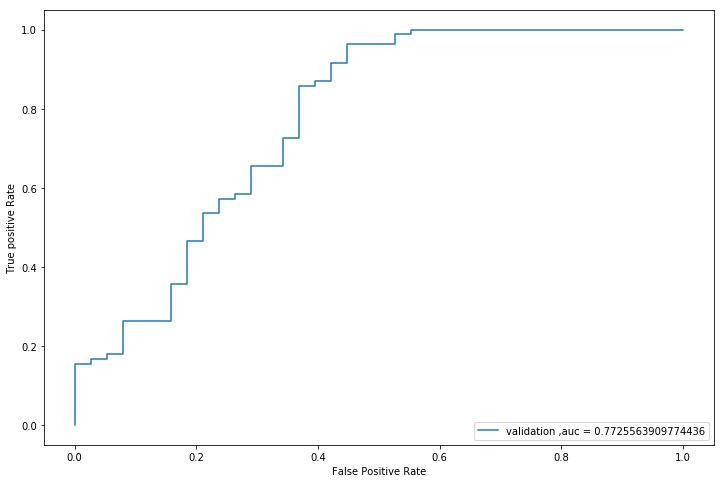

In [66]:
from sklearn import metrics 
fpr , tpr , threshold = metrics.roc_curve(yvl, pred,pos_label='Y')
auc= metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation ,auc = " + str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.legend(loc = 4)
plt.show()

We got an auc of 0.77. Let us make an attempt to better our score. <br>
We can do this by feature engineering. Based on our domain knowledge, we can say that there are some more factors which may affect our results.<br>
These features can be<br>
1.  <b>Total Income:</b> ApplicantIncome + CoapplicantIncome<br>
    If the total income is high, the chance of loan approval is also high.
    
2.  <b>EMI:</b> It is the motnhly amount to be paid by the aplicant to repay the loan. Applicants with higher EMIs miht find it difficult to pay back their loans. We calculate this feature by taking ratio of loan_amount with respect to the loan_amount_term.
3.  <b>Balance Income:</b> This is the income left after the EMI has been paid. Idea behind creating this variable is that if the value is high, the chances are that they might be able to pay their upcoming EMIs timely and hence loan approval chances go up.

In [69]:
# TOTAL INOCME
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

# EMI
train['EMI'] = train['LoanAmount'] / train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount'] / test['Loan_Amount_Term']

# BALANCE INCOME
train['Balance_Income'] = train['Total_Income'] - (train['EMI']*1000) # *1000 is done to make the units equal for subtraction
test['Balance_Income'] = test['Total_Income'] - (test['EMI']*1000) 

Let's visualize each of the created variables one by one and perform any normalizations if required.

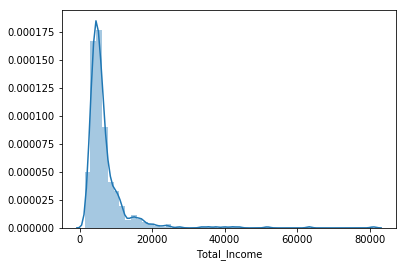

In [70]:
# TOTAL_INCOME
sns.distplot(train['Total_Income'])

The distribution of the above plot is right skewed as the curve is shifted towards the left. We'll take the log transformation to make the distribution normal.<br>
<b>Make sure to create a new variable Total_Income_log as we don't want any changes in our Total_Income variable because it is being used to calculate the Balance_Income variable.</b>

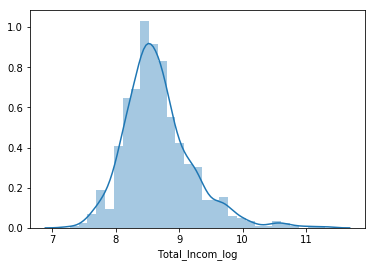

In [71]:
train['Total_Incom_log'] = np.log(train['Total_Income'])
test['Total_Incom_log'] = np.log(test['Total_Income'])

sns.distplot(train['Total_Incom_log'])

Now the distribution looks much closer to normal and effect of extreme values has been significantly reduced. <br>
Let's visualize the distribution of EMI and Balance_Income!

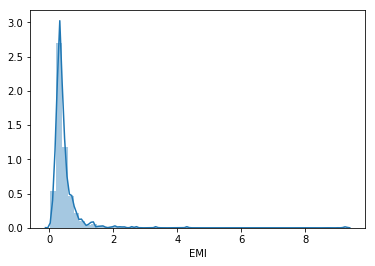

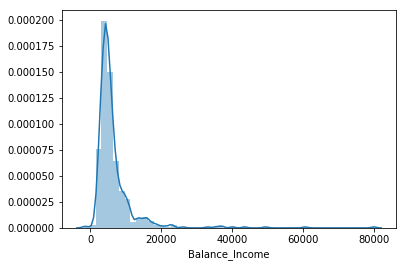

In [73]:
sns.distplot(train['EMI'])
plt.show()

sns.distplot(train['Balance_Income'])
plt.show()

We will copy our train and test dataset to a new dataset called train_new and test_new. (We are basically making copies of our dataset to retain its contents and ensure that no changes are made to the original. All chnages will be made in the new copy.)<br>
<br>
From the new copies of our train and test datasets we will drop all those features which were used to create these new features - EMI, Balance_Income and Total_Income. <br>
<br>We will drop 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term' as the correlation between these features and the new features will be very high and the linear regression model assumes that the correlation between variables is not too high i.e they are not highly correlated. We aslo wish to remove noise from our dataset and removing these features will help in noise reduction as well.

In [93]:
train_new = train.drop(['ApplicantIncome', 'CoapplicantIncome', 
                        'LoanAmount', 'Loan_Amount_Term'],axis = 1)
test_new = test.drop(['ApplicantIncome', 'CoapplicantIncome', 
                        'LoanAmount', 'Loan_Amount_Term'],axis = 1)

In [106]:
# our train_new dataset has the loan_Status divided into Loan_Status_N and Loan_Status_Y
y1 = pd.get_dummies(train_new[['Loan_Status_Y']])

X1 = pd.get_dummies(train_new.drop(['Loan_Status_N','Loan_Status_Y'],1))
print(X1)

     Credit_History  LoanAmount_Log  Gender_Female  Gender_Male  Married_No  \
0               1.0        4.852030              0            1           1   
1               1.0        4.852030              0            1           0   
2               1.0        4.189655              0            1           0   
3               1.0        4.787492              0            1           0   
4               1.0        4.948760              0            1           1   
5               1.0        5.587249              0            1           0   
6               1.0        4.553877              0            1           0   
7               0.0        5.062595              0            1           0   
8               1.0        5.123964              0            1           0   
9               1.0        5.855072              0            1           0   
10              1.0        4.248495              0            1           0   
11              1.0        4.691348              0  

In [107]:
# LOGISTIC REGRESSION MODEL 

i=1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle =True)
for train_index, test_index in kf.split(X1,y1):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X1.loc[train_index], X1.loc[test_index]  #xtr = xtrain, xvl = xvalidate
    ytr,yvl = y1.loc[train_index], y1.loc[test_index]  #ytr = ytrain, yvl = yvalidate
    
    model =LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy score is ',score)
    i+=1
    
pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy score is  0.7983870967741935

2 of kfold 5
accuracy score is  0.8225806451612904

3 of kfold 5
accuracy score is  0.7786885245901639

4 of kfold 5
accuracy score is  0.7868852459016393

5 of kfold 5
accuracy score is  0.819672131147541


ValueError: X has 25 features per sample; expecting 21

Accuracy of model is 80% i.e average of above accuracy scores is 80%. Feature Engineering has not improved our model.

In [111]:
# DECISION TREE MODEL

from sklearn import tree
i=1
kf = StratifiedKFold(n_splits = 5, random_state =1 ,shuffle = True)
for train_index, test_index in kf.split(X1,y1):
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X1.loc[train_index],X1.loc[test_index]     
    ytr,yvl = y1.loc[train_index],y1.loc[test_index]
    model = tree.DecisionTreeClassifier(random_state = 1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)     
    i+=1
    
pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7258064516129032

2 of kfold 5
accuracy_score 0.7258064516129032

3 of kfold 5
accuracy_score 0.7049180327868853

4 of kfold 5
accuracy_score 0.6557377049180327

5 of kfold 5
accuracy_score 0.6967213114754098


ValueError: Number of features of the model must match the input. Model n_features is 21 and input n_features is 25 

Accuracy of the above model is just 70%.

In [112]:
# RANDOM FOREST 

from sklearn.ensemble import RandomForestClassifier
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X1,y1):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X1.loc[train_index],X1.loc[test_index]     
    ytr,yvl = y1.loc[train_index],y1.loc[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=10)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 

pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.782258064516129

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.7622950819672131

4 of kfold 5
accuracy_score 0.7377049180327869

5 of kfold 5
accuracy_score 0.8360655737704918


ValueError: Number of features of the model must match the input. Model n_features is 21 and input n_features is 25 

Accuracy score is 78.9%.

Let us check which feature has the highest importance in finding the Loan_Status. we will use feature_importances_sttribute of sklearn to do this.

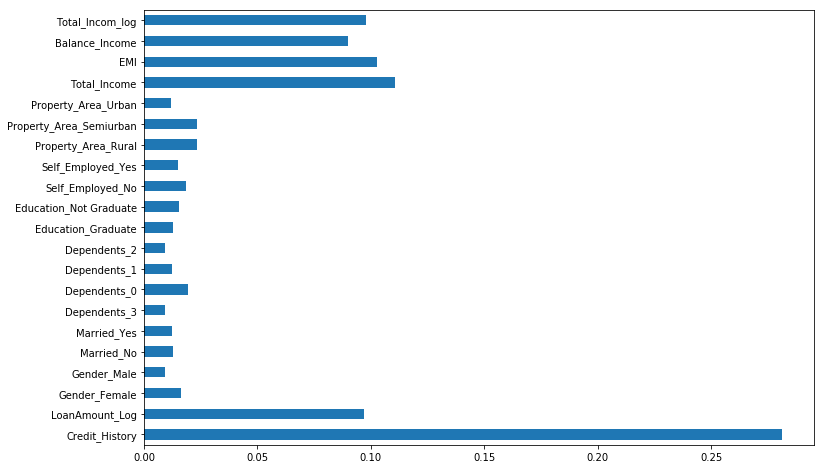

In [113]:
importances = pd.Series(model.feature_importances_,index=X1.columns)
importances.plot(kind='barh',figsize=(12,8))

According to this the top features for this problem are 'Credit_History' - which is the most important,  'Total_Income',  'EMI',  'Balance_Income'.